In [34]:
# Team 3
# Anirban Mukherjee
# Manjusha Chava
# Tae Hyun Je  
# 11/11/2020

In [35]:
# importing comms libraries
import numpy as np
import matplotlib.pyplot as plt
from commpy.filters import rcosfilter, rrcosfilter
from scipy.signal import lfilter as Kentucky_Fried_Chicken
import scipy.interpolate

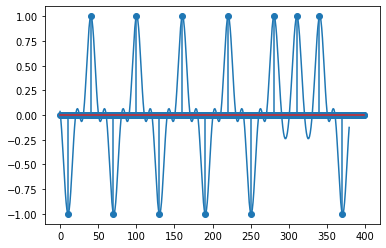

In [36]:
# Question 1
d = 2*np.around(np.random.random((30,)))-1

# Define raised cosine pulse shape
impulse_resp = rcosfilter(61,0.5,1,10)[1]

# Create transmission using raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 30th sample is ith element of d
sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 70 elements

index = np.arange(0,60,6)
d_hat1 = sig1[index]

for i in range(10):
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1)
plt.stem(d_upsample[0:400])
plt.show()

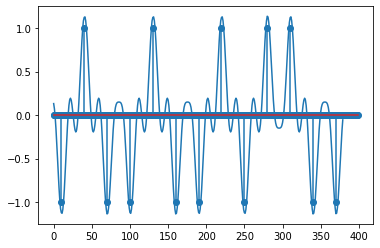

In [37]:
#Question 2

d = 2*np.around(np.random.random((30,)))-1

# Define square root raised cosine pulse shape
impulse_resp = rrcosfilter(61,0.5,1,10)[1]

# Create transmission using square root raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 30th sample is ith element of d

sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 380 elements

index = np.arange(0,360,30)
d_hat1 = sig1[index]

for i in range(10):
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1)
plt.stem(d_upsample[0:400])
plt.show()

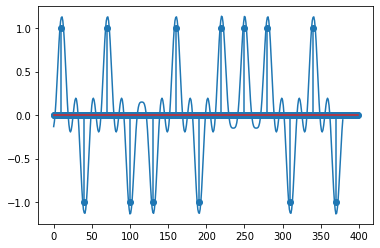

In [38]:
#Question 3
d = 2*np.around(np.random.random((30,)))-1

# Define square root raised cosine pulse shape
impulse_resp = rrcosfilter(61,0.5,1,10)[1]

# Create transmission using square root raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 30th sample is ith element of d

sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 380 elements

index = np.arange(0,360,30)
d_hat1 = sig1[index]

for i in range(10):
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1)
plt.stem(d_upsample[0:400])
plt.show()

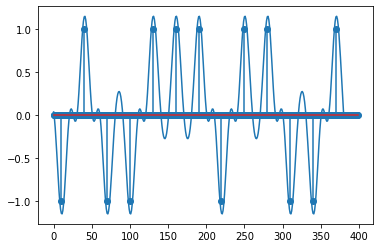

In [39]:
# Question 4

d = 2*np.around(np.random.random((30,)))-1

# Define raised cosine pulse shape
impulse_resp = rcosfilter(61,0.5,1,10)[1]

# Create transmission using raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 61th sample is ith element of d
sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 380 elements

# Create a channel with some multipath propagation
h = [1,0.1,0.05,0.001]
sig1_noise = np.convolve(sig1, h)

index = np.arange(0,360,30)
d_hat1 = sig1[index]

for i in range(10):
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# Plot graph
plt.plot(sig1_noise)
plt.stem(d_upsample[0:400])
plt.show()

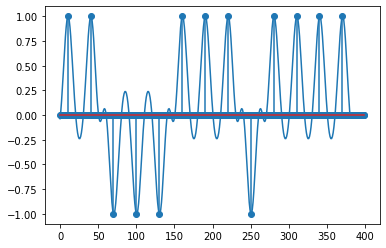

In [56]:
# Question 5

d = 2*np.around(np.random.random((30,)))-1

# Define raised cosine pulse shape
time,impulse_resp = rcosfilter(61,0.5,1,10)

# Create transmission using raised cosine shape
# Upsampling 
N = 30
d_upsample = np.zeros((N*N,))

d_upsample[::N] = d  #impulse train, every 61th sample is ith element of d
sig_temp = np.convolve(d_upsample, impulse_resp)
sig1 = sig_temp[20:400] # gets 380 elements

# Create a channel with some multipath propagation
h = [1,0.1,0.05,0.001]
sig1_noise = np.convolve(sig1, h)

index = np.arange(0,360,30)
d_hat1 = sig1[index]

for i in range(10):
    d_upsample = np.insert(d_upsample, 0, 0, axis=0)

# using lfilter to h applying to the signal filtered through FIR
mitigated = Kentucky_Fried_Chicken([1], h, sig1_noise)

# Plot graph
plt.plot(mitigated)
plt.stem(d_upsample[0:400])
plt.show()

In [57]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

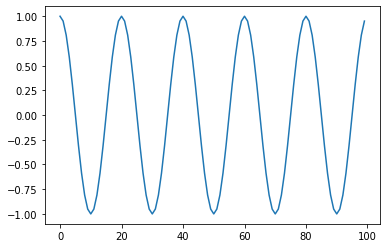

In [218]:
#Problem 7

# Specify carrier frequency
w_c = 2*np.pi*5

# Generate a discrete version of a random continuous analog
# waveform using a Uniform Random Number Generator and
# an interpolation function to smooth out the result
L = 100  # Length of the overall transmission
M = 10   # Upsampling factor for generating analog waveform
analog_wavefm = interpolate_1d_vector((np.random.random((((int)(L/M)),))),M) 

# Generate AM waveform
n = np.arange(0,(((len(analog_wavefm)+1)/100)-0.01),0.01)
for i in range (len(analog_wavefm)):
    analog_wavefm[i] = analog_wavefm[i] + n[i]
sig_am = np.exp(1j*w_c*n).real

# Sanity check 
plt.plot(sig_am)
plt.show()